In [1]:
from os import listdir
import numpy as np   
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
    
    
def pcaRes(title,direct, filt,bins):
    """
    calculate PCA for the covariance item matrix generated in Spark and creates plots
    
    Parameters
    ----------
    title: String; Partial title for plots
    direct: String; location of folder that holds the covariance matricies
    filt: String; name contained in each covariance file
    bins: Integer; Number of bins for the bar plot
    
    Return
    ------
    None; line and bar plots are produced for isotropy
    
    
    """
    holder = defaultdict(lambda: [])
    directory = ["".join([direct,i,"/"]) for i in listdir(direct) if filt in i]
    for i in directory:
        hp = map(lambda j: int(j),i.split("_")[1:4])
        data =""
        with open("".join([i,"part-00000"])) as f:
            data = f.readlines()
        ds = [i.replace("[","").replace("]","").replace("\n","").split(",") for i in data]
        ds =[map(lambda j: float(j),i) for i in ds]
        dsa = np.array(ds)
        _,s,_ = np.linalg.svd(dsa)
        cs =np.cumsum(s)
        mn,mx = cs.min(),cs.max()
        x= xrange(len(s))
        plt.plot(x,cs)
        plt.plot(x,np.linspace(mn,mx,len(s)))
        plt.title("".join([title," embedding ",str(hp[0])," walk length ",str(hp[1])," number of walks ",str(hp[2])]))
        plt.show()
        holder[hp[0]]+=[s]
        
    for i in sorted(holder.keys()):
        mn = np.mean(holder[i], axis=0)
        x = xrange(len(mn))
        plt.bar(x,mn)
        plt.title("".join([title," avgerage variance embed: ",str(i)]))
        plt.show()
        
        mnOmn = [np.mean(mn[k*bins:(k+1)*bins]) for k in xrange(len(mn)/bins)]
        plt.bar(xrange(len(mnOmn)), mnOmn)
        plt.title("".join([title," avgerage variance embed: ",str(i)," bucket size ",str(bins)]))
        plt.show()
        
        

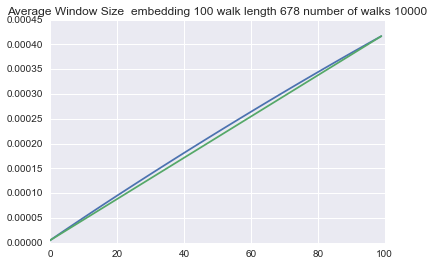

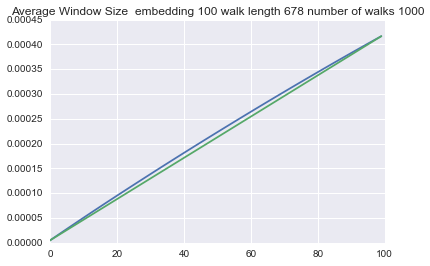

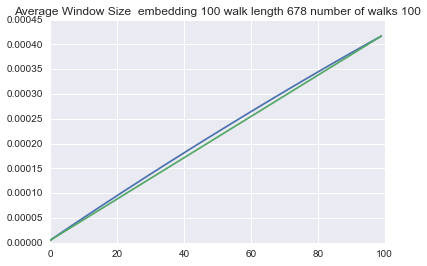

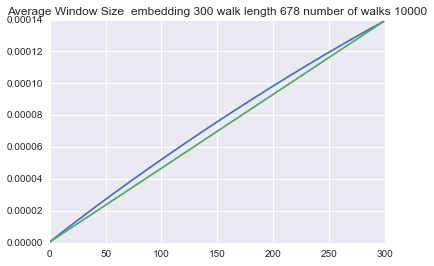

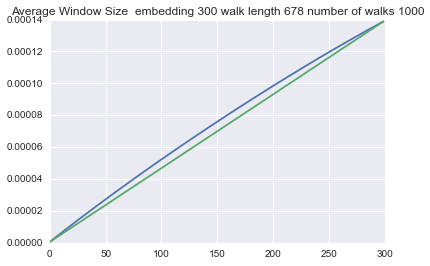

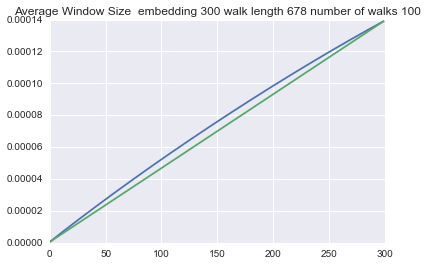

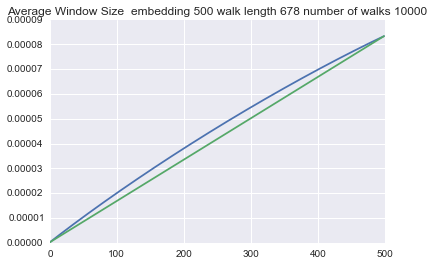

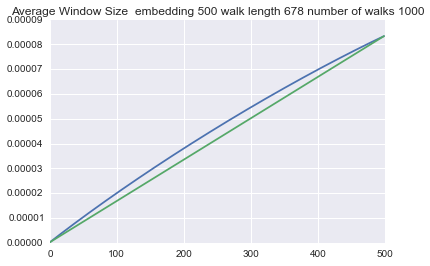

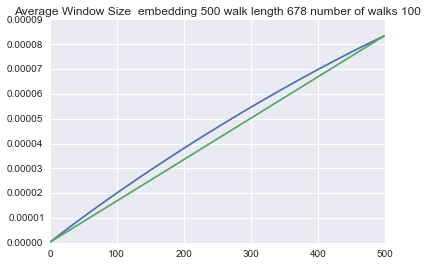

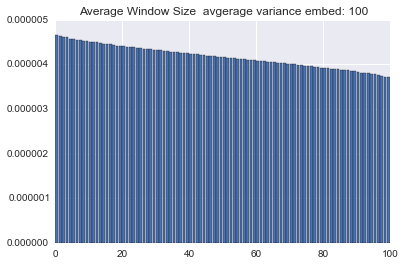

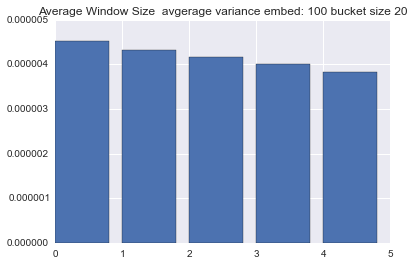

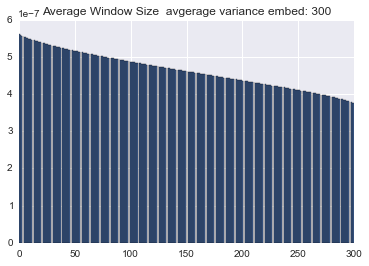

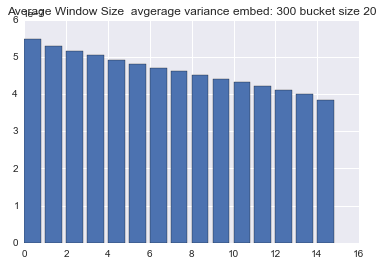

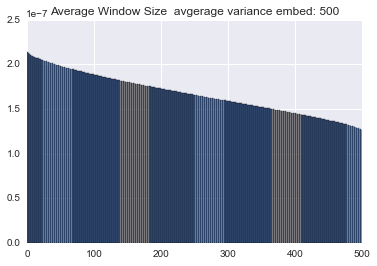

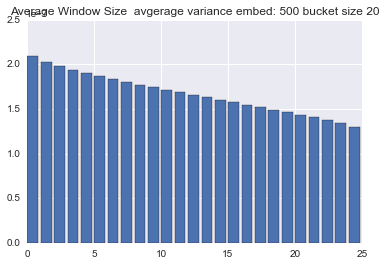

In [73]:
pcaRes("Average Window Size ","/Users/jacobbaumbach/l2vRmseTest/","pcaTestRes",20)